# 10720PHYS401200 Homework-1

## Problem 2: Markov-chain sampling of π

Implement and run Markov-chain sampling of π, starting $(x,y)=(1,1)$. Convince yourself, choosing a throwing range $\delta=0.3$, that $Z = N_{hits}/N$ converges towards $\pi/4$. 

For a fixed larger $N$, run it **twenty** times and
* Plot $\frac{1}{20} \sum_{r=1}^{20} (Z_r - \frac{\pi}{4})^2$ as a function of $\delta$ for $\delta\in [0, 3]$.
* Plot the rejection rate of this algorithm as a function of $\delta$. 

Which value of the rejection rate yields the highest precision?

In [2]:
# import necessary libraries
import matplotlib.pyplot as plt
import numpy as np

In [26]:
N_rnd = 20
N = 10000
x_i, y_i = 1.0, 1.0

Sample_reject_rate = []
Sample_err = []
for delta in np.arange(0.3, 3.3, 0.3):
    print('\ndelta: {:.3f}'.format(delta))
    Zrs = []
    reject = []
    # Run
    for run in range(N_rnd):
        x, y = x_i, y_i
        accept = 0
        N_hit = 0
        # Monte Carlo loop
        for n in range(N):
            dx = delta * (np.random.random()*2 - 1)
            dy = delta * (np.random.random()*2 - 1)
            if abs(x+dx) < 1 and abs(y+dy) < 1:
                x += dx
                y += dy
                accept += 1
            else:
                x = x
                y = y
            if x**2 + y**2 <= 1:
                N_hit += 1
        Zrs.append(N_hit/N)
        reject.append((N-accept)/N)
    mean, err = (sum(Zrs)/N_rnd), []
    for Zr in Zrs:
        err.append((Zr-(np.pi/4))**2)
    Sample_reject_rate.append(sum(reject)/N_rnd)
    Sample_err.append(sum(err)/N_rnd)
    print('Round: {}, Reject_Rate: {:.6f}%, N: {}, Est_'.format(N_rnd, 100*sum(reject)/N_rnd, N) \
          + u'\u03C0'+': {:.6f}'.format(mean*4) + ', Error: {:.10f}'.format(sum(err)/N_rnd))


delta: 0.300
Round: 20, Reject_Rate: 14.408500%, N: 10000, Est_π: 3.147080, Error: 0.0001164730

delta: 0.600
Round: 20, Reject_Rate: 27.960000%, N: 10000, Est_π: 3.122440, Error: 0.0000795724

delta: 0.900
Round: 20, Reject_Rate: 40.058000%, N: 10000, Est_π: 3.134400, Error: 0.0000719544

delta: 1.200
Round: 20, Reject_Rate: 51.052000%, N: 10000, Est_π: 3.143780, Error: 0.0000529035

delta: 1.500
Round: 20, Reject_Rate: 60.970500%, N: 10000, Est_π: 3.152760, Error: 0.0000832963

delta: 1.800
Round: 20, Reject_Rate: 69.852000%, N: 10000, Est_π: 3.136180, Error: 0.0000923145

delta: 2.100
Round: 20, Reject_Rate: 77.140500%, N: 10000, Est_π: 3.156340, Error: 0.0001437360

delta: 2.400
Round: 20, Reject_Rate: 82.621000%, N: 10000, Est_π: 3.132040, Error: 0.0001619282

delta: 2.700
Round: 20, Reject_Rate: 86.078000%, N: 10000, Est_π: 3.172820, Error: 0.0002316082

delta: 3.000
Round: 20, Reject_Rate: 88.938000%, N: 10000, Est_π: 3.117080, Error: 0.0002541945


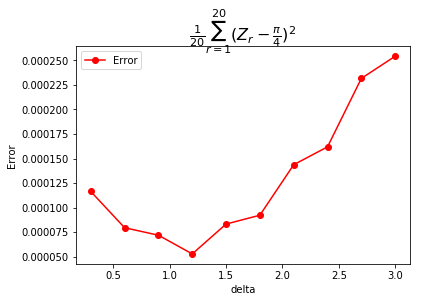

In [28]:
delta = np.arange(0.3, 3.3, 0.3)
plt.plot(delta, Sample_err, 'ro-', label='Error')
plt.legend()
plt.title(r'$\frac{1}{20} \sum_{r=1}^{20} (Z_r - \frac{\pi}{4})^2$', fontsize=16)
plt.xlabel(r'delta')
plt.ylabel(r'Error')
plt.show()

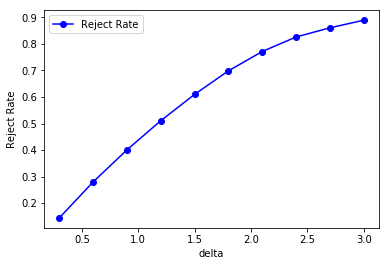

In [30]:
delta = np.arange(0.3, 3.3, 0.3)
plt.plot(delta, Sample_reject_rate, 'bo-', label='Reject Rate')
plt.legend()
plt.xlabel(r'delta')
plt.ylabel(r'Reject Rate')
plt.show()